#  Dataset de Kaggle
https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4/input


La efectividad del sistema de predicción de cáncer ayuda a las personas a conocer su riesgo de cáncer a bajo costo y también les ayuda a tomar la decisión apropiada basada en su estado de riesgo de cáncer.


Total no. of attributes:16 No .of instances:284 Attribute information: 1. Gender: M(male), F(female) 2. Age: Age of the patient 3. Smoking: YES=2 , NO=1. 4. Yellow fingers: YES=2 , NO=1. 5. Anxiety: YES=2 , NO=1. 6. Peer_pressure: YES=2 , NO=1. 7. Chronic Disease: YES=2 , NO=1. 8. Fatigue: YES=2 , NO=1. 9. Allergy: YES=2 , NO=1. 10. Wheezing: YES=2 , NO=1. 11. Alcohol: YES=2 , NO=1. 12. Coughing: YES=2 , NO=1. 13. Shortness of Breath: YES=2 , NO=1. 14. Swallowing Difficulty: YES=2 , NO=1. 15. Chest pain: YES=2 , NO=1. 16. Lung Cancer: YES , NO.

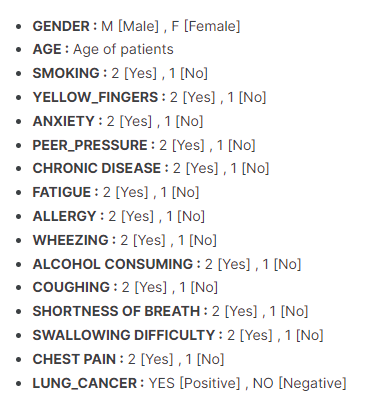

### Importamos las librerías necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import neighbors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import f_classif
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)

### Cargamos el dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/carolProg/SNS_23_24/main/ACT_3_4_PROYECTO/surveylungcancer.csv')

df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
# Vemos todas las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Categorizar y normalizar datos

In [ ]:
# Comprobamos si hay valores nulos en el dataset.
null_values = df.isnull().sum()
null_values

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
# Borramos las filas con valores nulos
df = df.dropna()

In [ ]:
# Como no tenemos valores nulos en las columnas las vamos a categorizar todas
label = LabelEncoder()

for col in df.columns:
    df[col] = label.fit_transform(df[col])

In [ ]:
# YES = 1 , NO = 0
df['LUNG_CANCER'].unique()

array([1, 0])

In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,26,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,31,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,16,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,20,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,20,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,13,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,27,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,15,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,24,1,0,1,0,0,1,1,0,1,1,1,0,1,1


###Gráfico de Correlation

<Axes: >

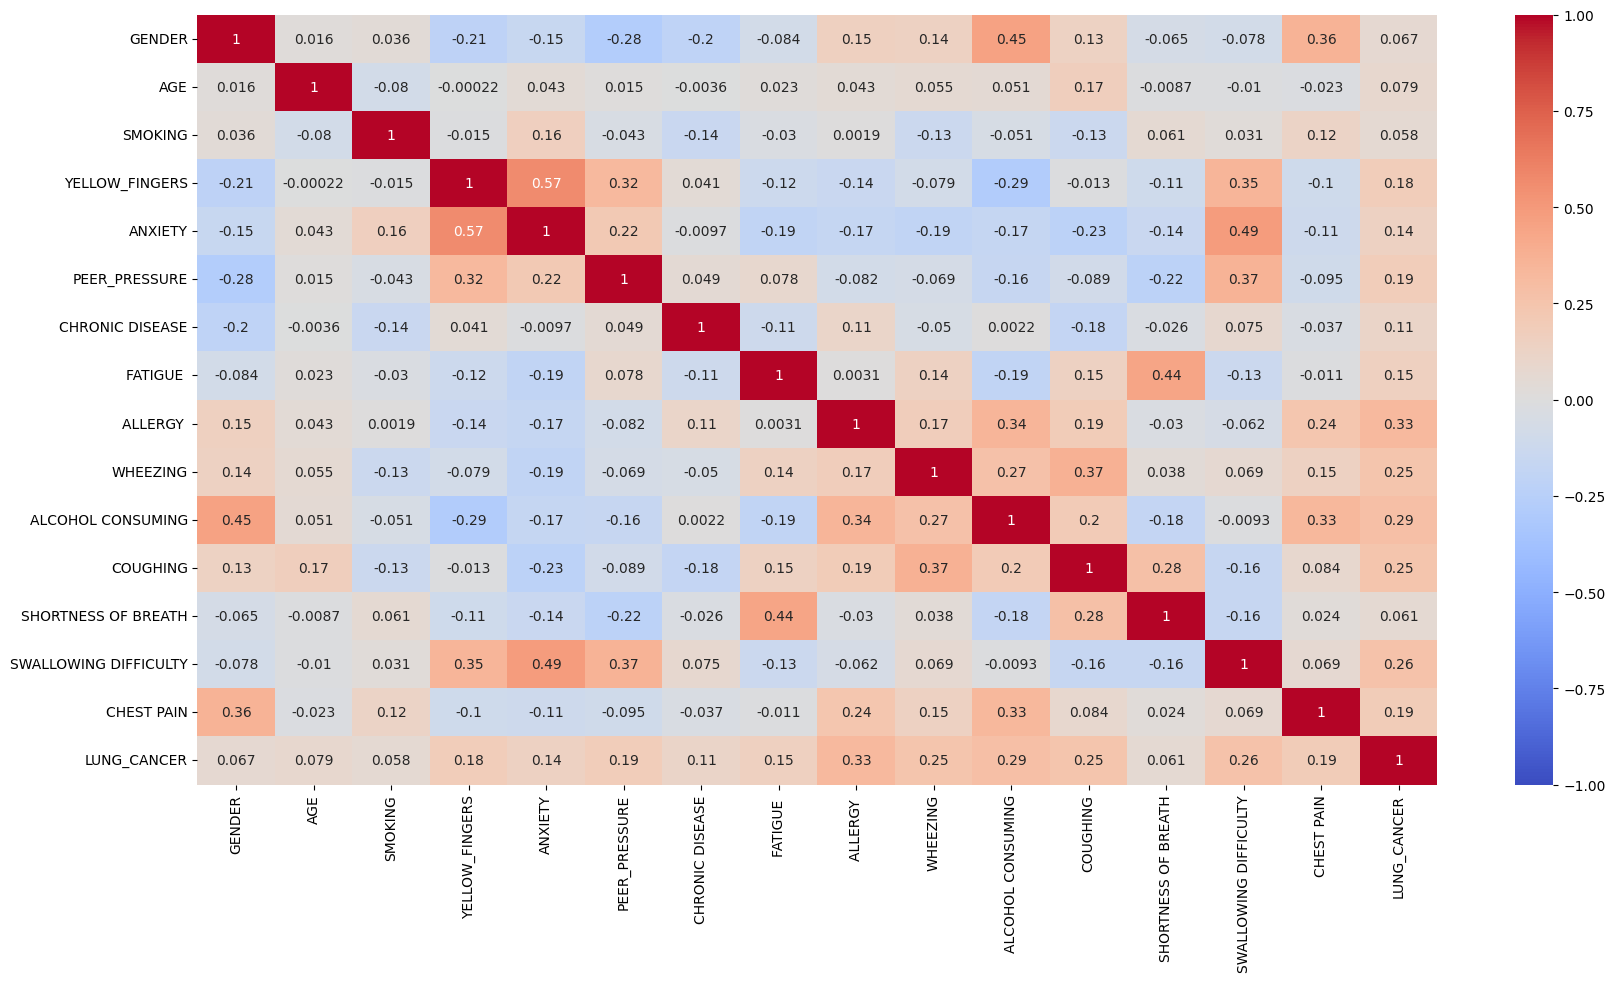

In [ ]:
cor = df.corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(cor , vmin = -1 , vmax = 1 , cmap = "coolwarm" , annot= True)

La matriz de correlación visualiza las relaciones lineales entre diferentes variables. Aquí hay algunas observaciones:

**Relaciones fuertes**: Los cuadros más oscuros de color rojo y azul indican correlaciones más fuertes. Por ejemplo, la variable "ANXIETY" tiene una correlación relativamente fuerte positiva con "PEER_PRESSURE" (0.57), y "ALCOHOL_CONSUMING" tiene una fuerte correlación positiva con "GENDER" (0.45). Una correlación positiva significa que cuando el valor de una variable aumenta, el valor de la otra tiende a aumentar también.

**Correlaciones débiles o nulas**: Los cuadros que tienen un color más claro indican una correlación débil o ninguna correlación. Por ejemplo, "AGE" y "GENDER" tienen una correlación muy baja (0.016), lo que indica que no hay una relación lineal significativa entre estas dos variables.

**Relaciones potenciales con el cáncer de pulmón**: La fila y columna "LUNG_CANCER" muestra cómo cada variable se relaciona con la presencia de cáncer de pulmón. No hay ninguna correlación que sea extremadamente alta, lo que sugiere que no hay un solo factor que sea un predictor muy fuerte por sí mismo. Sin embargo, hay algunas variables con correlaciones moderadas, como "SWALLOWING_DIFFICULTY" (0.35) y "CHEST_PAIN" (0.33) que podrían ser consideradas como síntomas más comunes en pacientes con cáncer de pulmón.

**Variables independientes**: Algunas variables parecen tener muy poco en común, como "CHRONIC_DISEASE" y "YELLOW_FINGERS" que tienen una correlación casi cero. Esto indica que estos factores no se influencian entre sí o son independientes en el contexto del conjunto de datos.

**Posibles factores de riesgo**: Las variables con correlaciones más altas podrían ser vistas como posibles factores de riesgo para el cáncer de pulmón o síntomas asociados, aunque la correlación por sí sola no implica causalidad.

**Multicolinealidad**: Las variables que están fuertemente correlacionadas entre sí (como "ANXIETY" y "PEER_PRESSURE") pueden indicar multicolinealidad, que es cuando dos o más variables predictoras en un modelo estadístico son altamente linealmente relacionadas.

Es importante recordar que la correlación no implica causalidad. Las altas correlaciones solo indican posibles relaciones que pueden merecer una investigación más detallada para establecer cualquier relación causal. Además, las correlaciones se basan en relaciones lineales; podrían existir relaciones no lineales que no se detectarían con este método.

In [ ]:
# Borramos estas columnas
df = df.drop(columns=["GENDER","AGE","SHORTNESS OF BREATH"])

<Axes: >

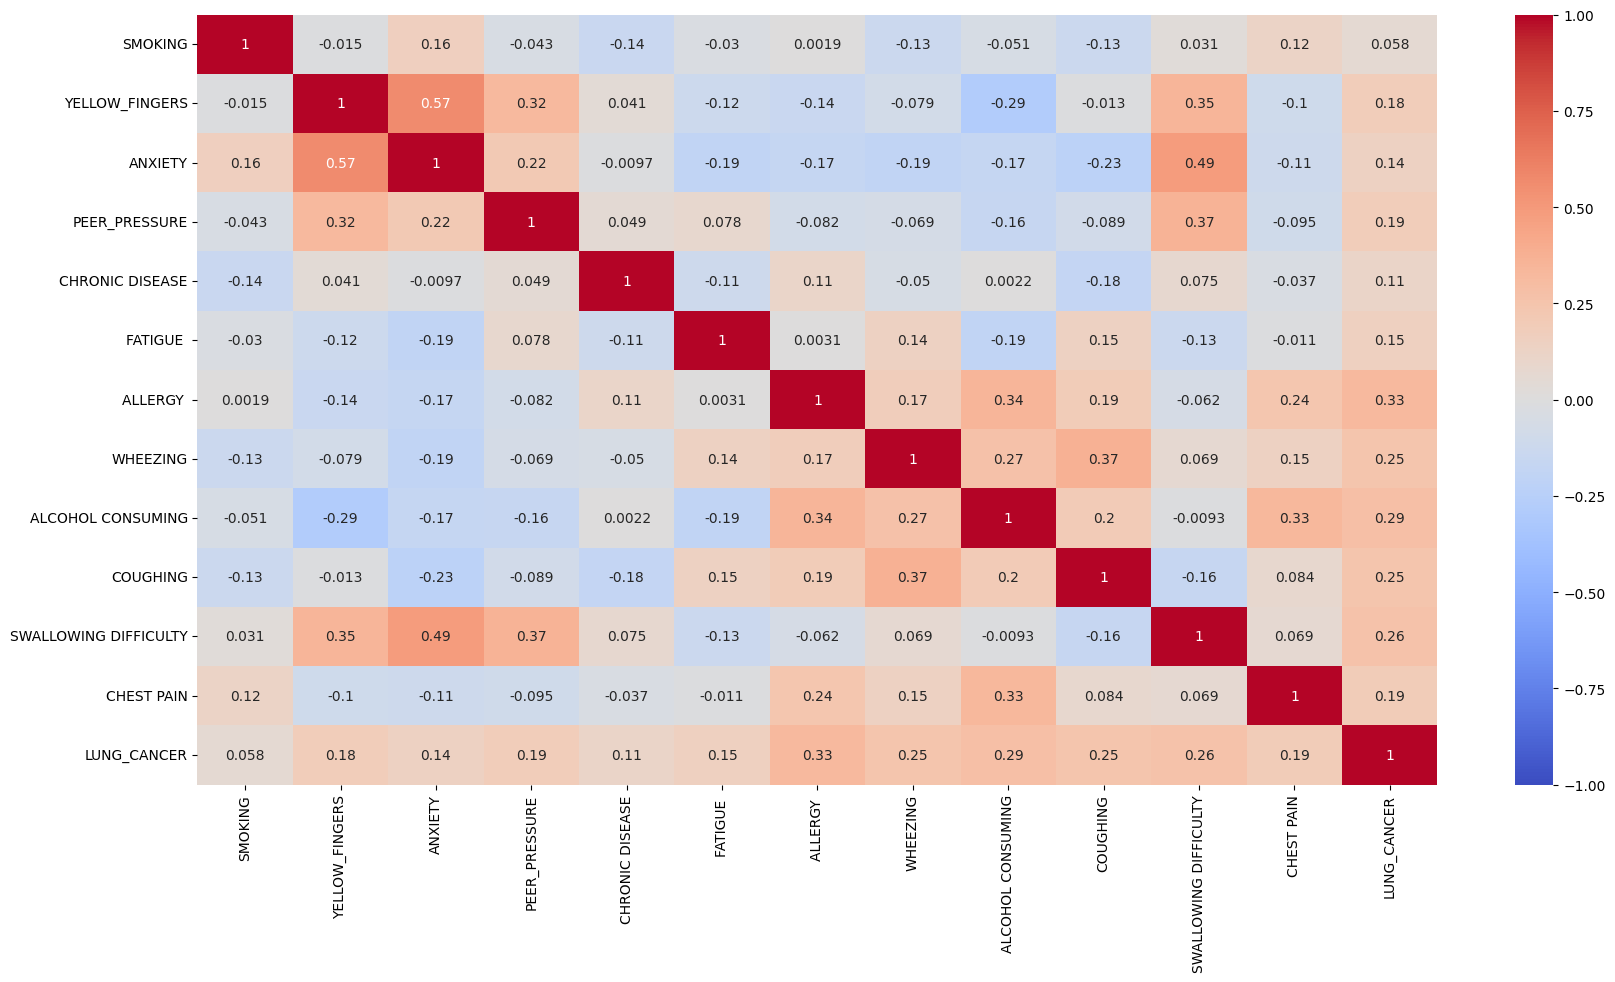

In [ ]:
cor = df.corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(cor , vmin = -1 , vmax = 1 , cmap = "coolwarm" , annot= True)

### Gráfico de Dispersión

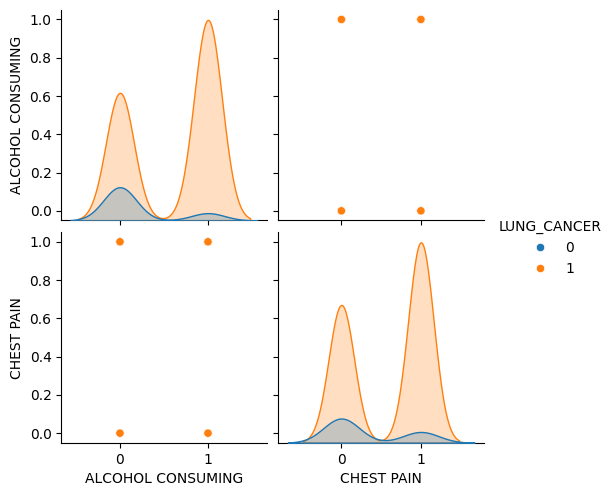

In [ ]:
data_pairplots = df[['ALCOHOL CONSUMING', 'CHEST PAIN','LUNG_CANCER']]
sns.pairplot(data_pairplots, hue='LUNG_CANCER')
plt.show()

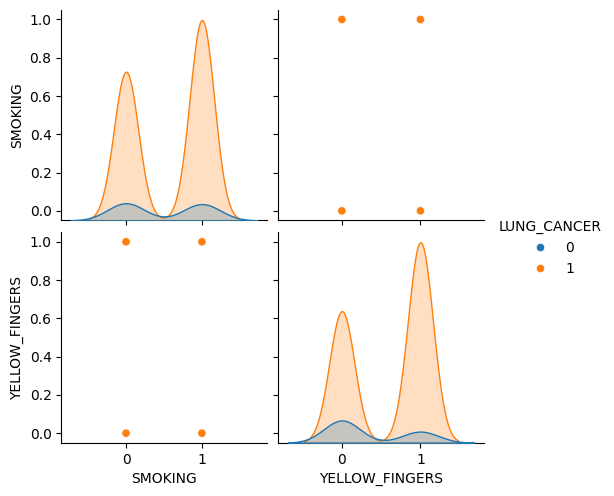

In [ ]:
data_pairplots = df[['SMOKING', 'YELLOW_FINGERS', 'LUNG_CANCER']]
sns.pairplot(data_pairplots, hue='LUNG_CANCER')
plt.show()

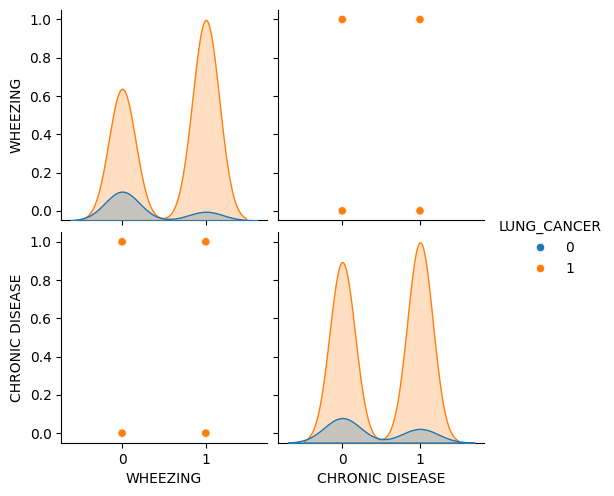

In [ ]:
data_pairplots = df[['WHEEZING', 'CHRONIC DISEASE','LUNG_CANCER']]
sns.pairplot(data_pairplots, hue='LUNG_CANCER')
plt.show()

### KBest

In [ ]:
y = df['LUNG_CANCER']

In [ ]:
# Seleccionamos las mejores características
aux = df['LUNG_CANCER']
df= df.drop(['LUNG_CANCER'], axis=1)
for i in range(1, 6, 1):
  k = i
  selector = SelectKBest(score_func=f_classif, k=k)

  X_new = selector.fit_transform(df, y)

  selected_columns = df.columns[selector.get_support()]

  print("Características seleccionadas:" + str(i))
  print(str(selected_columns) + "\n")

Características seleccionadas:1
Index(['ALLERGY '], dtype='object')

Características seleccionadas:2
Index(['ALLERGY ', 'ALCOHOL CONSUMING'], dtype='object')

Características seleccionadas:3
Index(['ALLERGY ', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY'], dtype='object')

Características seleccionadas:4
Index(['ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY'], dtype='object')

Características seleccionadas:5
Index(['ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY'],
      dtype='object')



Hemos utilizado la función SelectKBest con el score function f_classif para seleccionar las características más relevantes de un conjunto de datos relacionado con el cáncer de pulmón.

Las características seleccionadas se eligen con base en la relación estadística que tienen con la variable objetivo, que en este caso es si una persona tiene cáncer de pulmón o no (LUNG_CANCER).

El proceso itera sobre un rango de valores para k, que define el número de características a seleccionar. En cada iteración, SelectKBest selecciona las k mejores características según los puntajes más altos de la prueba ANOVA F-value que mide la dependencia lineal entre cada característica y la variable objetivo. Los resultados muestran cuáles son las características más relevantes para cada valor de k.

Por ejemplo:
Con k=1, se selecciona solo la característica más relevante, que es ALLERGY.
Con k=2, se añade una segunda característica relevante, ALCOHOL CONSUMING.
Y así sucesivamente hasta k=5, donde las características seleccionadas son ALLERGY, WHEEZING, ALCOHOL CONSUMING, COUGHING, y SWALLOWING DIFFICULTY.

Estas características pueden estar relacionadas con síntomas, hábitos o condiciones previas que están estadísticamente asociadas con la presencia de cáncer de pulmón en el conjunto de datos estudiado. No significa necesariamente que estas características sean causas del cáncer de pulmón, sino que tienen una asociación significativa con la enfermedad dentro de los datos analizados.

Es importante recordar que los resultados de cualquier análisis estadístico deben interpretarse con cuidado y en el contexto de conocimientos clínicos y médicos relevantes.

In [ ]:
df = pd.concat([df, aux], axis=1)

In [ ]:
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,26,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,31,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,16,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,20,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,20,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,13,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,27,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,15,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,24,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [ ]:
selected_columns = ['ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY',
       'WHEEZING', 'COUGHING']
x = df[selected_columns]

In [ ]:
# Finally this is the train model part
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Naive Bayes sin Cross Validation

In [ ]:
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB', 'CategoricalNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB(), CategoricalNB()]

for name, clf in zip(names, classifiers):

  # Fit the model
  clf.fit(X_train, y_train)
  # Predict and the score on each NaiveBayes method
  score = clf.score(X_test, y_test) # Returns the mean accuracy on the given test data and labels.
  print ("Modelo Sin Cross Validation: %s = %6.2f" % (name, score))

Modelo Sin Cross Validation: GaussianNB =   0.94
Modelo Sin Cross Validation: MultiNomialNB =   0.92
Modelo Sin Cross Validation: BernouilliNB =   0.94
Modelo Sin Cross Validation: ComplementNB =   0.53
Modelo Sin Cross Validation: CategoricalNB =   0.94


In [ ]:
# Función para la matriz de confusión

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):

    if not title:
        if normalize:
            title = 'Matriz de confusión normalizada'
        else:
            title = 'Matriz de confusión sin normalización'


    cm = confusion_matrix(y_true, y_pred)

    # Usamos las etiquetas que aparecen en los datos
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    # Iteramos con las dimensiones de los datos
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

Matriz de confusión, sin normalización
[[ 5  2]
 [ 4 82]]


<Axes: title={'center': 'Matriz de confusión sin normalización'}, xlabel='Predicted label', ylabel='True label'>

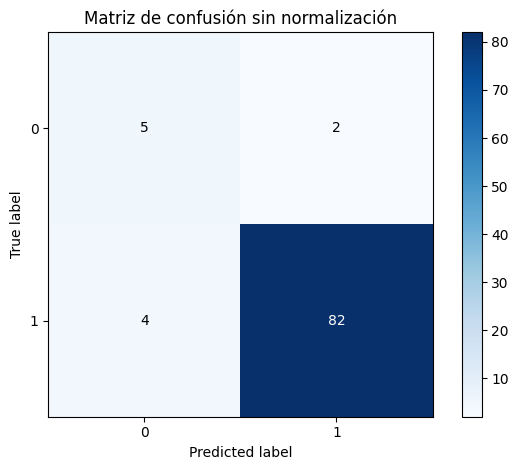

In [ ]:
# Matriz de gráfico de correlación con implementación GaussianNB (Es la mejor)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

### NaiveBayes con Cross Validation

In [ ]:
# NaiveBayes con Cross Validation
from sklearn.model_selection import cross_val_score

sos = []
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Puntuaciones para {}:".format(name))
    print(scores)
    sos.append(scores)

for i in range(len(names)):
    print("Modelo Con Cross Validation (Con Librería): {} = {:.2f}".format(names[i], sos[i].mean()))

Puntuaciones para GaussianNB:
[0.81818182 0.88372093 0.81395349 0.93023256 0.79069767]
Puntuaciones para MultiNomialNB:
[0.84090909 0.86046512 0.86046512 0.86046512 0.8372093 ]
Puntuaciones para BernouilliNB:
[0.86363636 0.88372093 0.81395349 0.93023256 0.79069767]
Puntuaciones para ComplementNB:
[0.54545455 0.48837209 0.6744186  0.51162791 0.55813953]
Puntuaciones para CategoricalNB:
[0.86363636 0.88372093 0.81395349 0.93023256 0.79069767]
Modelo Con Cross Validation (Con Librería): GaussianNB = 0.85
Modelo Con Cross Validation (Con Librería): MultiNomialNB = 0.85
Modelo Con Cross Validation (Con Librería): BernouilliNB = 0.86
Modelo Con Cross Validation (Con Librería): ComplementNB = 0.56
Modelo Con Cross Validation (Con Librería): CategoricalNB = 0.86


##Conclusión
Tenemos resultados de precisión para varios modelos de Naive Bayes sin y con validación cruzada (cross-validation). La validación cruzada es una técnica para evaluar la habilidad de un modelo de machine learning para predecir datos nuevos y es esencial para prevenir el problema de sobreajuste (overfitting), donde un modelo funciona bien en los datos de entrenamiento pero no generaliza bien a datos no vistos.

Aquí están algunas conclusiones que podemos sacar de los resultados presentados:

- **Disminución de la precisión con validación cruzada**: Todos los modelos muestran una disminución en la precisión cuando se aplica la validación cruzada. Esto es normal y esperado, ya que la validación cruzada proporciona una estimación más realista del rendimiento del modelo en datos no vistos. Los modelos que tienen una precisión alta sin validación cruzada pueden estar sobreajustados, y la validación cruzada ayuda a revelar su rendimiento real.

- **Rendimiento de los modelos Naive Bayes**: El GaussianNB, BernoulliNB, y CategoricalNB tienen un rendimiento bastante similar con y sin validación cruzada, lo que sugiere que estos modelos son bastante estables y potencialmente no están sobreajustados. En cambio, ComplementNB muestra una gran disminución en la precisión con la validación cruzada, lo que podría indicar que el modelo está sobreajustado o no es adecuado para la estructura de los datos.

- **ComplementNB**: Este modelo tiene la precisión más baja en ambos casos. Esto podría significar que este tipo de Naive Bayes no es el adecuado para la distribución de los datos o que requiere una forma diferente de preprocesamiento.

- **Comparación entre modelos**: El CategoricalNB muestra la precisión más alta sin validación cruzada y una precisión razonablemente alta con validación cruzada. Esto podría indicar que es el modelo más adecuado de los probados para este conjunto de datos específico, asumiendo que la métrica de precisión es el principal indicador de rendimiento.

- **Importancia de la validación cruzada**: Los resultados destacan la importancia de usar validación cruzada cuando se evalúan modelos de machine learning. Permite entender mejor cómo el modelo generalizará a datos nuevos, lo que es crucial para su aplicación en situaciones del mundo real.

In [ ]:
# Variable Modelo
model = MultinomialNB()

# Datos de entrenameinto
model.fit(X_train, y_train)
print(X_test.shape)

(93, 4)


In [ ]:
# Datos predicción
y_model = model.predict(X_test)
y_model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
# Transformamos las variables categóricas
y_test_df= y_test.to_frame()
y_test_df['LUNG_CANCER'].replace(['NO', 'YES'],[0, 1], inplace=True)
y_test_df

,LUNG_CANCER
288,1
9,1
57,1
60,1
25,1
...,...
172,1
250,1
19,0
146,1


In [ ]:
y_model_df= pd.DataFrame(y_model, columns = ['LUNG_CANCER'])
y_model_df['LUNG_CANCER'].replace(['NO', 'YES'],[0, 1], inplace=True)
y_model_array = y_model_df['LUNG_CANCER'].to_numpy()
y_model_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

Matriz de confusión, sin normalización
[[ 0  7]
 [ 0 86]]


<Axes: title={'center': 'Matriz de Confusión Normalizada'}, xlabel='Predicted label', ylabel='True label'>

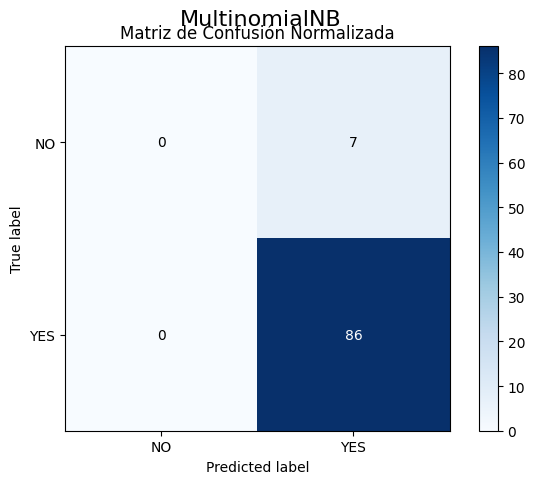

In [ ]:
LC = np.array(['NO', 'YES'])
plot_confusion_matrix(y_test_df['LUNG_CANCER'], y_model_array, classes=LC, normalize=False, title='Matriz de Confusión Normalizada', titleSup='MultinomialNB')

### Extra SVM

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Precisión del modelo SVM: {accuracy:.2f}')

Precisión del modelo SVM: 0.92


Matriz de confusión, sin normalización
[[ 0  7]
 [ 0 86]]


<Axes: title={'center': 'Matriz de confusión sin normalización'}, xlabel='Predicted label', ylabel='True label'>

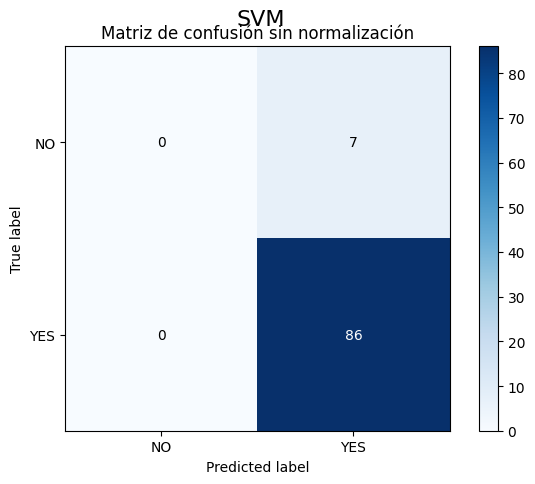

In [ ]:
LC = np.array(['NO', 'YES'])
plot_confusion_matrix(y_test, y_pred_svm, classes = LC, normalize=False, titleSup='SVM')

## Extra MLP

In [ ]:
# Crear el clasificador MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Entrenar el modelo MLP
mlp_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_mlp = mlp_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f'Precisión del modelo MLP: {accuracy:.2f}')

Precisión del modelo MLP: 0.94


Matriz de confusión, sin normalización
[[ 5  2]
 [ 4 82]]


<Axes: title={'center': 'Matriz de confusión sin normalización'}, xlabel='Predicted label', ylabel='True label'>

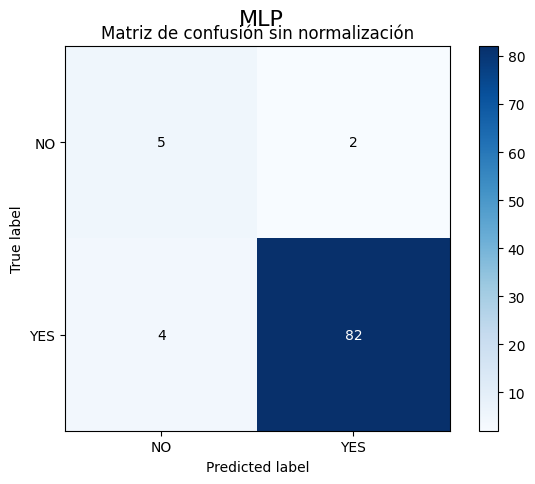

In [ ]:
LC = np.array(['NO', 'YES'])
plot_confusion_matrix(y_test, y_pred_mlp, classes = LC, normalize=False, titleSup='MLP')

La matriz de confusión  representa el rendimiento de un modelo de perceptrón multicapa (MLP) para la clasificación binaria del cáncer de pulmón. En el contexto de esta matriz:

"YES" indica la presencia de cáncer de pulmón.
"NO" indica la ausencia de cáncer de pulmón.

La matriz muestra los siguientes valores:

- *Verdaderos negativos (TN)*: 5 casos en los que el modelo predijo correctamente la ausencia de cáncer de pulmón (NO) cuando realmente no había cáncer.

- *Falsos positivos (FP)*: 2 casos en los que el modelo predijo incorrectamente la presencia de cáncer de pulmón (YES) cuando realmente no había cáncer (errores de Tipo I).

- *Falsos negativos (FN)*: 4 casos en los que el modelo predijo incorrectamente la ausencia de cáncer de pulmón (NO) cuando en realidad sí había cáncer (errores de Tipo II, y considerados a menudo más graves en contextos médicos).

- *Verdaderos positivos (TP)*: 82 casos en los que el modelo predijo correctamente la presencia de cáncer de pulmón (YES) cuando realmente había cáncer.

Con base en esta matriz de confusión, el modelo parece tener una alta cantidad de verdaderos positivos y una baja cantidad de falsos negativos y falsos positivos, lo cual es bueno, especialmente en un contexto médico donde un falso negativo podría significar un diagnóstico perdido de cáncer de pulmón y un falso positivo podría llevar a pruebas médicas innecesarias.

La matriz de confusión es una herramienta importante para evaluar la precisión de un modelo de clasificación, ya que permite ver no solo cuando el modelo predice correctamente, sino también qué tipos de errores está cometiendo.